In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.options.display.max_rows = 20

In [3]:
file = pd.read_csv('gapminder.csv')
gapminder = file

In [9]:
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.00,604.0
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.00,604.0
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.00,625.0
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.00,647.0
...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592.0,51.60,90.800,3.64,1626.0
14736,Zimbabwe,2012,Africa,14565482.0,54.20,91.330,3.56,1750.0
14737,Zimbabwe,2013,Africa,14898092.0,55.70,91.670,3.49,1773.0
14738,Zimbabwe,2014,Africa,15245855.0,57.00,91.900,3.41,1773.0


In [13]:
gapminder.columns

Index(['country', 'year', 'region', 'population', 'life_expectancy',
       'age5_surviving', 'babies_per_woman', 'gdp_per_capita'],
      dtype='object')

In [16]:
gapminder['log_gdp_per_day'] = np.log10(gapminder.gdp_per_capita / 365.25)

In [18]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,0.217727
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,0.218447
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,0.218447
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,0.233290
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,0.248314


In [65]:
gapminder.tail()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
14735,Zimbabwe,2011,Africa,14255592.0,51.6,90.80,3.64,1626.0,0.648530
14736,Zimbabwe,2012,Africa,14565482.0,54.2,91.33,3.56,1750.0,0.680448
14737,Zimbabwe,2013,Africa,14898092.0,55.7,91.67,3.49,1773.0,0.686119
14738,Zimbabwe,2014,Africa,15245855.0,57.0,91.90,3.41,1773.0,0.686119
14739,Zimbabwe,2015,Africa,15602751.0,59.3,92.04,3.35,1801.0,0.692923


In [19]:
gapminder_by_year = gapminder.set_index('year').sort_index()

In [20]:
gapminder_by_country = gapminder.set_index('country').sort_index()

<Axes: xlabel='log_gdp_per_day', ylabel='life_expectancy'>

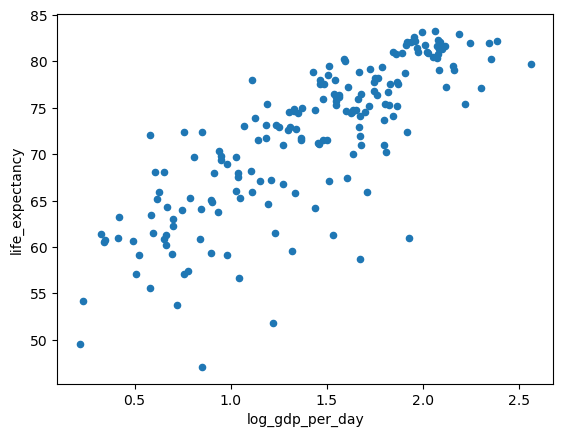

In [69]:
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'life_expectancy')

<Axes: xlabel='log_gdp_per_day', ylabel='life_expectancy'>

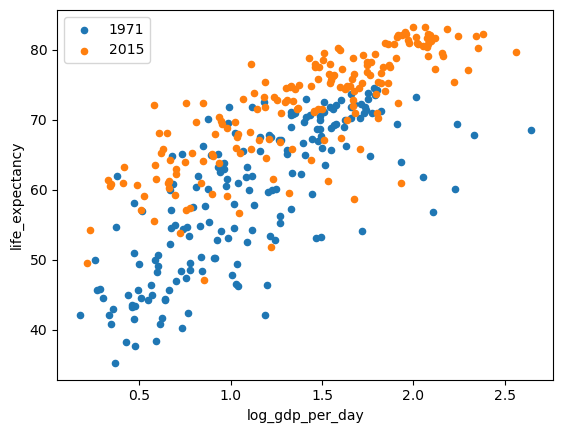

In [39]:
axes = gapminder_by_year.loc[1971].plot.scatter('log_gdp_per_day', 'life_expectancy', label=1971)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'life_expectancy', label=2015, color='C1', ax=axes)

<Axes: xlabel='log_gdp_per_day', ylabel='age5_surviving'>

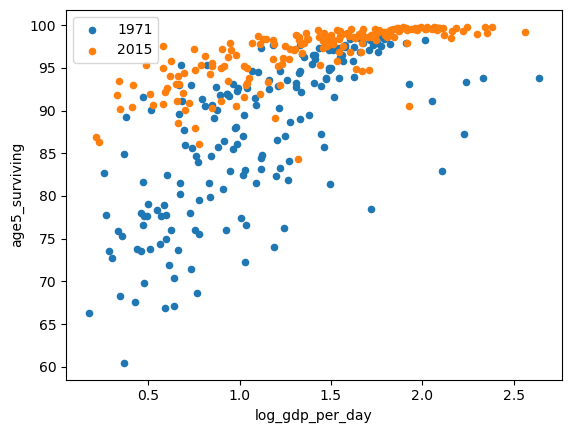

In [44]:
axes = gapminder_by_year.loc[1971].plot.scatter('log_gdp_per_day', 'age5_surviving', label=1971)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'age5_surviving', label=2015, color='C1', ax=axes)

<Axes: xlabel='year'>

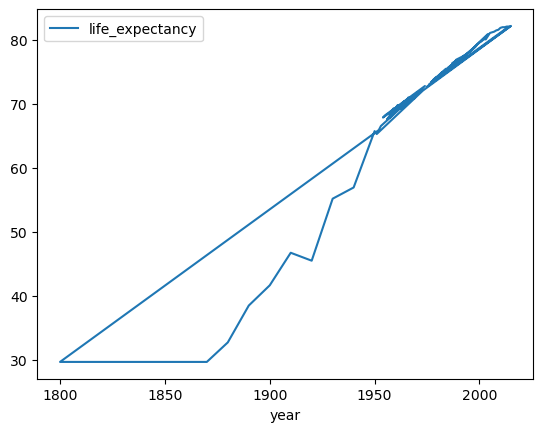

In [47]:
gapminder_by_country.loc['Italy'].plot('year', 'life_expectancy')

<Axes: xlabel='year'>

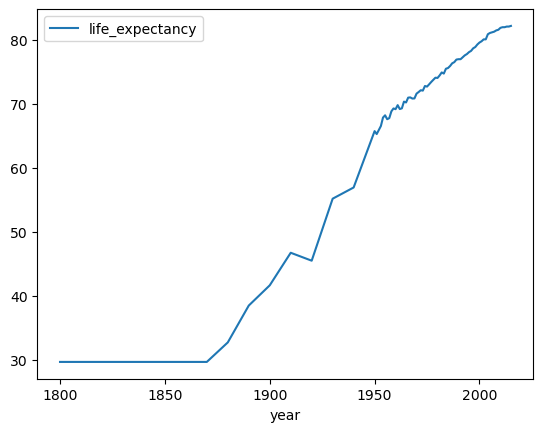

In [54]:
gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy')

Text(0, 0.5, 'life expectancy')

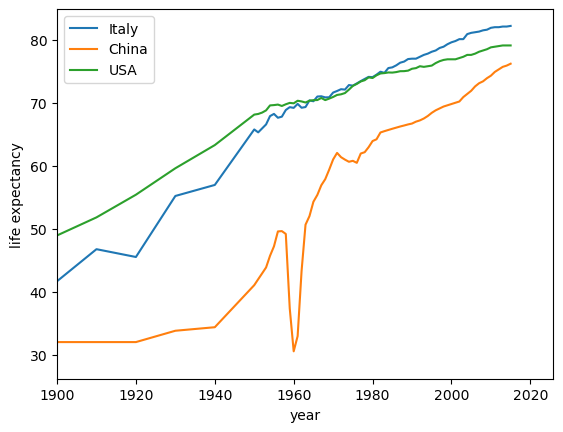

In [61]:
axes = gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy', label='Italy')
gapminder_by_country.loc['China'].sort_values('year').plot('year', 'life_expectancy', label='China', ax=axes)
gapminder_by_country.loc['United States'].sort_values('year').plot('year', 'life_expectancy', label='USA', ax=axes)

plt.axis(xmin=1900)
plt.ylabel('life expectancy')

In [62]:
gapminder.babies_per_woman.mean()

4.643471506105834

Text(0, 0.5, 'Age 5 survical [%]')

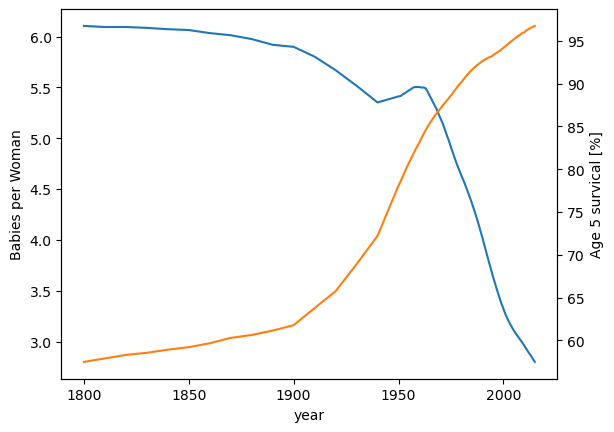

In [64]:
gapminder.groupby('year').babies_per_woman.mean().plot()
plt.ylabel('Babies per Woman')

gapminder.groupby('year').age5_surviving.mean().plot(secondary_y=True)
plt.ylabel('Age 5 survical [%]')

In [66]:
gapminder.pivot_table('babies_per_woman', 'year', 'region')

region,Africa,America,Asia,Europe
year,,,,
1800,6.393208,6.055758,6.291923,5.561628
1810,6.394151,6.040000,6.281154,5.540233
1820,6.394340,6.031515,6.292692,5.545909
1830,6.395472,6.046364,6.285577,5.506591
1840,6.396226,6.046970,6.255577,5.486591
...,...,...,...,...
2011,4.569811,2.340000,2.736923,1.605227
2012,4.508868,2.315152,2.700769,1.606818
2013,4.447547,2.294242,2.664038,1.617727


Text(0, 0.5, 'Babies per Woman')

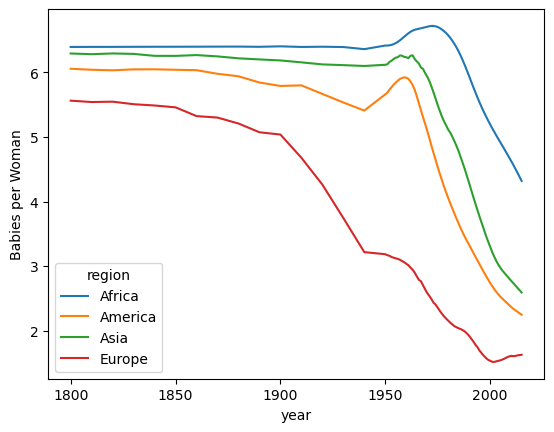

In [67]:
gapminder.pivot_table('babies_per_woman', 'year', 'region').plot()
plt.ylabel('Babies per Woman')

<Axes: xlabel='year'>

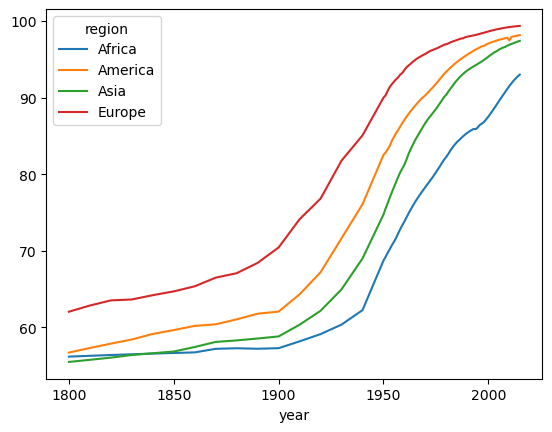

In [68]:
gapminder.pivot_table('age5_surviving', 'year', 'region').plot()